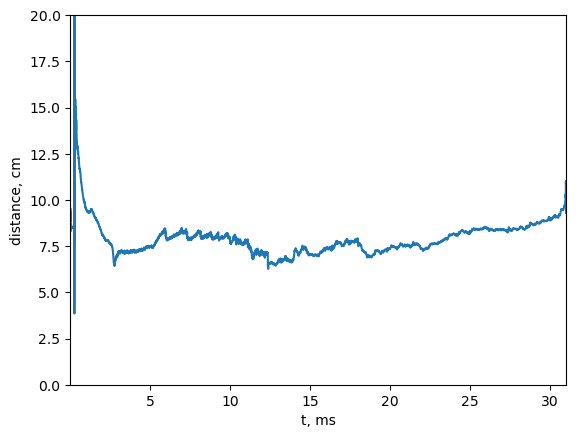

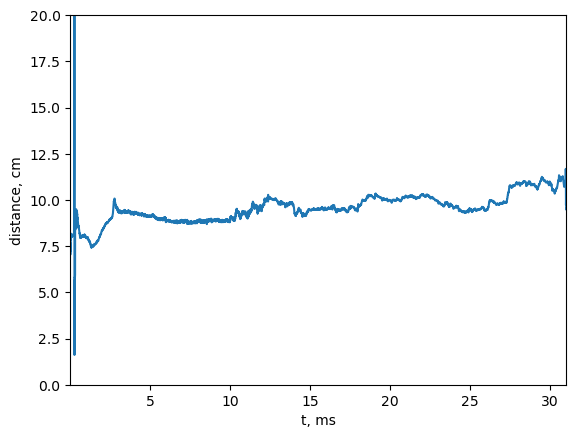

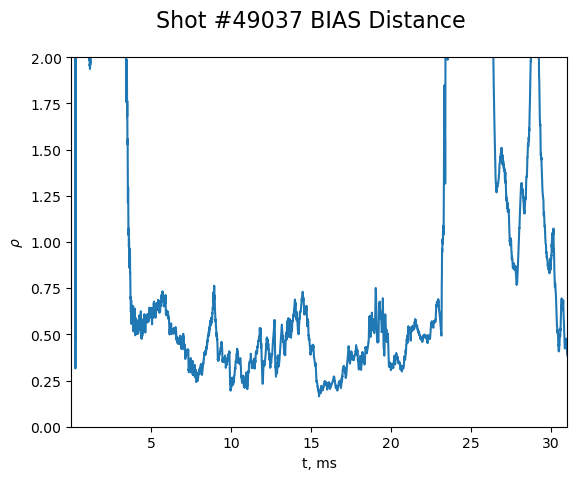

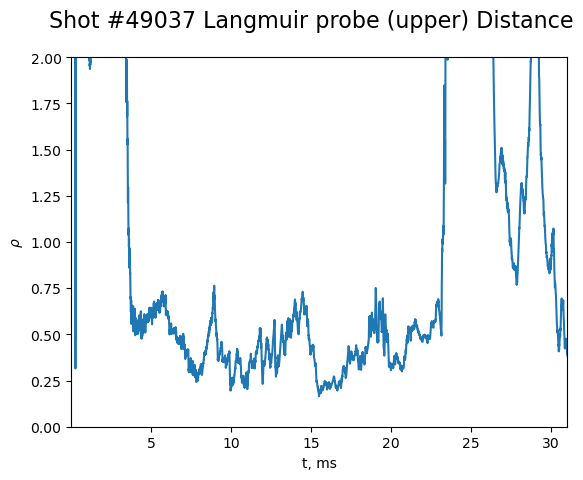

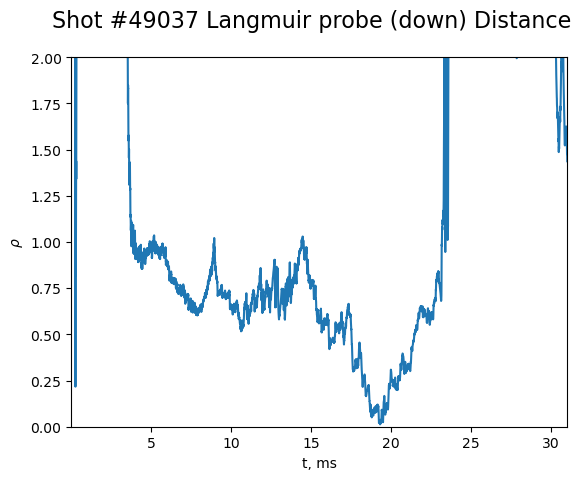

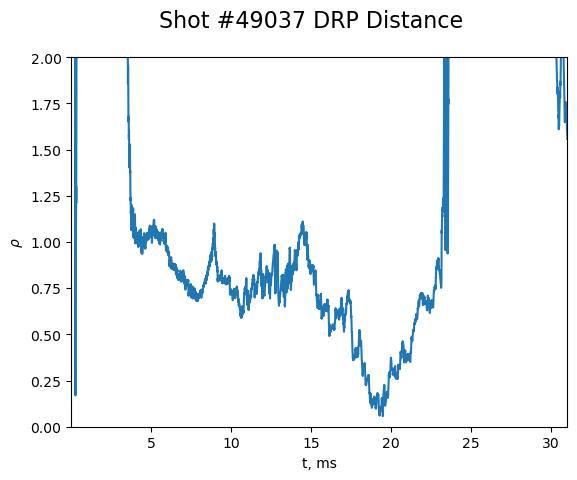

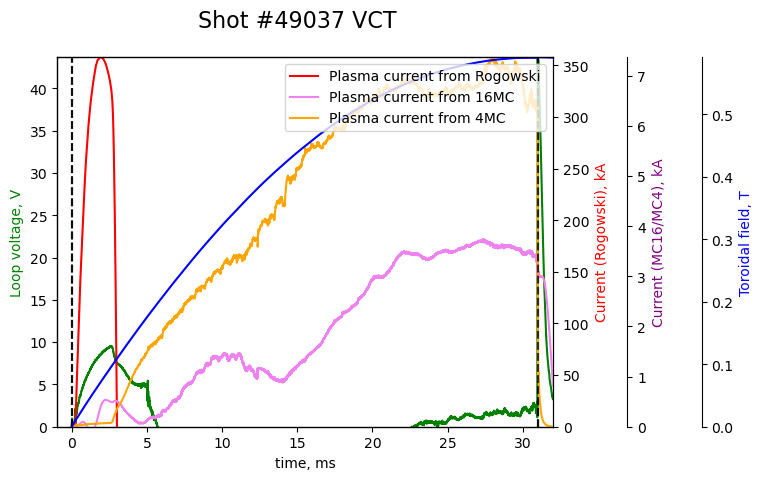

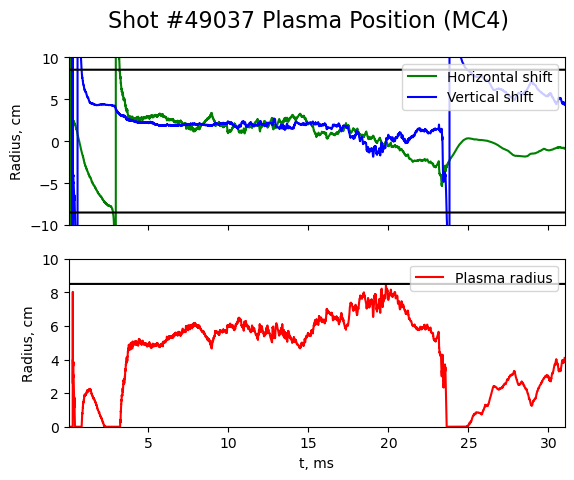

KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.patches as patch
import scipy as sc
import matplotlib.animation as animation
import os
from GOLEM_notebook_scripts.py import plasma_current, correct_signal, discharge_duration, calib_slope, MC_array, plasma_position, current_MC16

In [ ]:
vacuum_shot = 49021
shot = 49025

I_pl = plasma_current(shot, vacuum_shot)
U_loop = correct_signal('U_loop', shot, vacuum_shot)
B_t = correct_signal('B_t', shot, vacuum_shot)
t_0, t_1 = discharge_duration(I_pl, U_loop)
I_pl = calib_slope(I_pl, (t_0-1.0, t_0-0.5), (t_1+10.0, t_1+10.5))

MC4L = MC_array('MC_lim', shot, vacuum_shot)
MC16_array = MC_array('MC16', shot, vacuum_shot)

Δz, Δr, r_pl = plasma_position('MC_lim', MC4L)
#Δz1, Δr1, r_pl1 = plasma_position('MC16', MC16_array)
I_pl_MC = current_MC16(MC16_array)
#I_pl_MC2 = current_MC4(MC4L)
#q = edge_safety_factor(Δz, Δr, r_pl, I_pl, B_t, t_0, t_1)
#L_BIAS, rho_BIAS = distance_between(r_0 - z_BIAS, R_0, Δz, R_0 + Δr, r_pl)
#L_DRP, rho_DRP = distance_between(-r_0 + z_DRP, R_0, Δz, R_0 + Δr, r_pl)

#plot_distance_between(rho_BIAS, 'rho')
#plot_distance_between(rho_DRP, 'rho')
#fig1 = plot_distance_between(L_BIAS, 'distance')
#fig2 = plot_distance_between(L_DRP, 'distance')

def plot_position(Δz, Δr, r_pl):
    fig2, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    plt.sca(ax1)
    plt.plot(Δr[0], Δr[1], label='Horizontal shift', color='green')
    plt.plot(Δz[0], Δz[1], label='Vertical shift', color='blue')
    plt.plot(Δr[0], Δr[0]-Δr[0]+r_lim, color='black')
    plt.plot(Δr[0], Δr[0]-Δr[0]-r_lim, color='black' )
    plt.ylim(-r_0, r_0)
    plt.xlim(t_0, t_1)
    plt.ylabel('Radius, cm')
    plt.legend(loc = 'upper right')
    plt.sca(ax2)
    plt.plot(r_pl[0], r_pl[1], label='Plasma radius', color='red')
    plt.plot(Δr[0], Δr[0]-Δr[0]+r_lim, color='black')
    plt.ylim(0, r_0)
    plt.xlabel('t, ms')
    plt.ylabel('Radius, cm')
    plt.legend(loc = 'upper right')
    return fig2